<a href="https://colab.research.google.com/github/YSlillia/BankMarketing-Analysis/blob/main/Bank_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 安裝套件

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

In [ ]:
#匯入資料
data= pd.read_csv('/Users/yushan/Desktop/bank.csv')

In [ ]:
data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

# 資料前處理

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
print(data.shape)

#確認各項目的缺失值
print(data.isnull().sum())

(41188, 21)
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [ ]:
data.describe() #描述統計

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

# 轉換資料型態
job, marital, education 資料型態 object 轉換成 int64

In [ ]:
#查看工作分類
unique_labels = data['job'].unique()
num_labels = len(unique_labels)
print("工作標籤的數量：", num_labels)
print("工作標籤：", unique_labels)

工作標籤的數量： 12
工作標籤： ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [ ]:
# 型態轉換 以數字做為代號
data['job'] = data['job'].str.replace("admin.","0")
data['job'] = data['job'].str.replace("unknown","1")
data['job'] = data['job'].str.replace("unemployed","2")
data['job'] = data['job'].str.replace("management","3")
data['job'] = data['job'].str.replace("housemaid","4")
data['job'] = data['job'].str.replace("entrepreneur","5")
data['job'] = data['job'].str.replace("student","6")
data['job'] = data['job'].str.replace("blue-collar","7")
data['job'] = data['job'].str.replace("self-employed","8")
data['job'] = data['job'].str.replace("retired","9")
data['job'] = data['job'].str.replace("technician","10")
data['job'] = data['job'].str.replace("services","11")
data['job']=data['job'].astype('int64')

In [ ]:
#查看教育程度分類
unique_labels = data['education'].unique()
num_labels = len(unique_labels)
print("數量：", num_labels)
print("標籤：", unique_labels)

數量： 8
標籤： ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


In [ ]:
data['education'] = data['education'].str.replace("basic.4y","0")
data['education'] = data['education'].str.replace("basic.6y","1")
data['education'] = data['education'].str.replace("basic.9y","2")
data['education'] = data['education'].str.replace("high.school","3")
data['education'] = data['education'].str.replace("illiterate","4")
data['education'] = data['education'].str.replace("professional.course","5")
data['education'] = data['education'].str.replace("university.degree","6")
data['education'] = data['education'].str.replace("unknown","7")
data['education']=data['education'].astype('int64')

In [ ]:
unique_labels = data['marital'].unique()
num_labels = len(unique_labels)
print('數量：', num_labels)
print('標籤：', unique_labels)

數量： 4
標籤： ['married' 'single' 'divorced' 'unknown']


In [ ]:
data['marital'] = data['marital'].str.replace("divorced","0")
data['marital'] = data['marital'].str.replace("married","1")
data['marital'] = data['marital'].str.replace("single","2")
data['marital'] = data['marital'].str.replace("unknown","3")
data['marital']=data['marital'].astype('int64')

In [ ]:
data.describe() # job,education,marital轉換型態後的描述統計

age           job       marital     education      duration  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406      5.599082      1.172769      3.747184    258.285010   
std       10.42125      4.010901      0.608902      2.136482    259.279249   
min       17.00000      0.000000      0.000000      0.000000      0.000000   
25%       32.00000      0.000000      1.000000      2.000000    102.000000   
50%       38.00000      7.000000      1.000000      3.000000    180.000000   
75%       47.00000     10.000000      2.000000      6.000000    319.000000   
max       98.00000     11.000000      3.000000      7.000000   4918.000000   

           campaign         pdays      previous  emp.var.rate  cons.price.idx  \
count  41188.000000  41188.000000  41188.000000  41188.000000    41188.000000   
mean       2.567593    962.475454      0.172963      0.081886       93.575664   
std        2.770014    186.910907      0.494901      1.570960        0.578840   
min        1.000000      0.000000      0.000000     -3.400000       92.201000   
25%        1.000000    999.000000      0.000000     -1.800000       93.075000   
50%        2.000000    999.000000      0.000000      1.100000       93.749000   
75%        3.000000    999.000000      0.000000      1.400000       93.994000   
max       56.000000    999.000000      7.000000      1.400000       94.767000   

       cons.conf.idx     euribor3m   nr.employed  
count   41188.000000  41188.000000  41188.000000  
mean      -40.502600      3.621291   5167.035911  
std         4.628198      1.734447     72.251528  
min       -50.800000      0.634000   4963.600000  
25%       -42.700000      1.344000   5099.100000  
50%       -41.800000      4.857000   5191.000000  
75%       -36.400000      4.961000   5228.100000  
max       -26.900000      5.045000   5228.100000

判別每個欄位的型態

In [ ]:
def Col_Types(Data):
    Column_Types = Data.dtypes.to_frame().reset_index()
    Column_Types.columns = ['ColumnName', 'Type']
    Column_Types.sort_values(by ='Type', inplace = True)
    return Column_Types
display( Col_Types(data))

ColumnName     Type
0              age    int64
13        previous    int64
12           pdays    int64
11        campaign    int64
10        duration    int64
3        education    int64
2          marital    int64
1              job    int64
19     nr.employed  float64
15    emp.var.rate  float64
16  cons.price.idx  float64
17   cons.conf.idx  float64
18       euribor3m  float64
5          housing   object
6             loan   object
7          contact   object
8            month   object
9      day_of_week   object
14        poutcome   object
4          default   object
20               y   object

In [ ]:
# 客戶是否訂閱了定期存款
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

# 資料視覺化

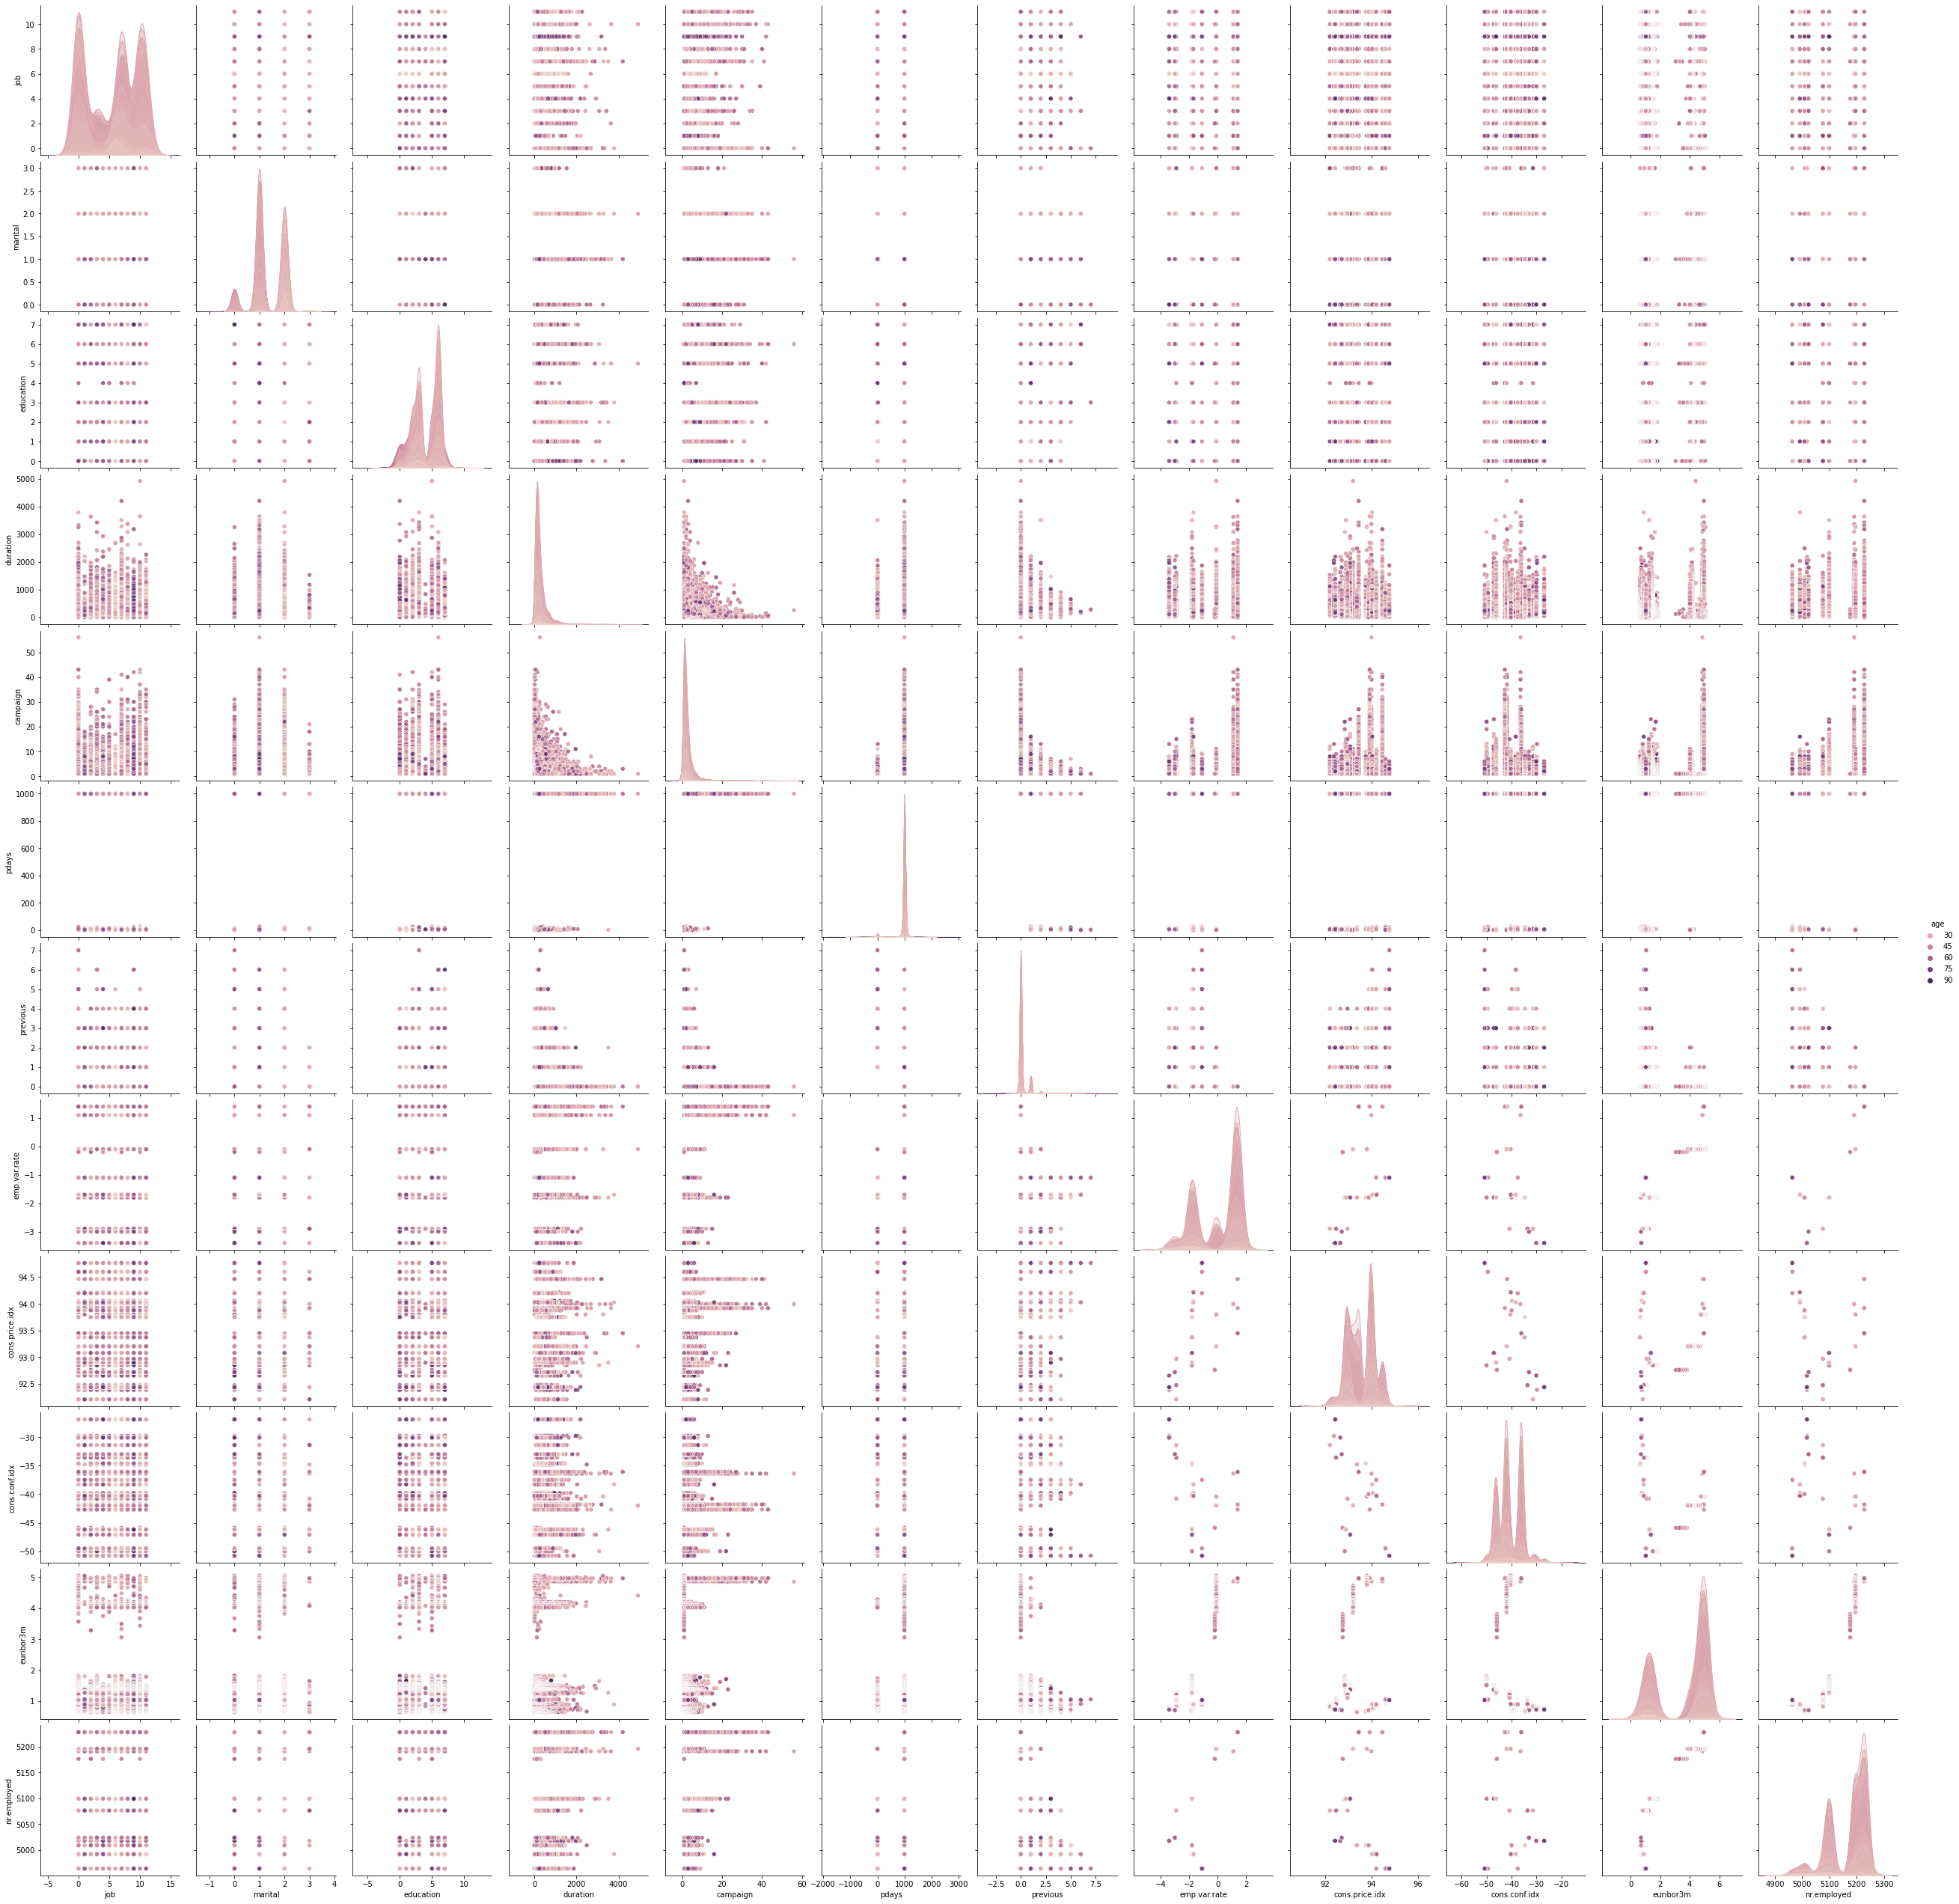

In [ ]:
# 查看年齡與其他類別的關係
sns.pairplot(data,hue="age",height=3)

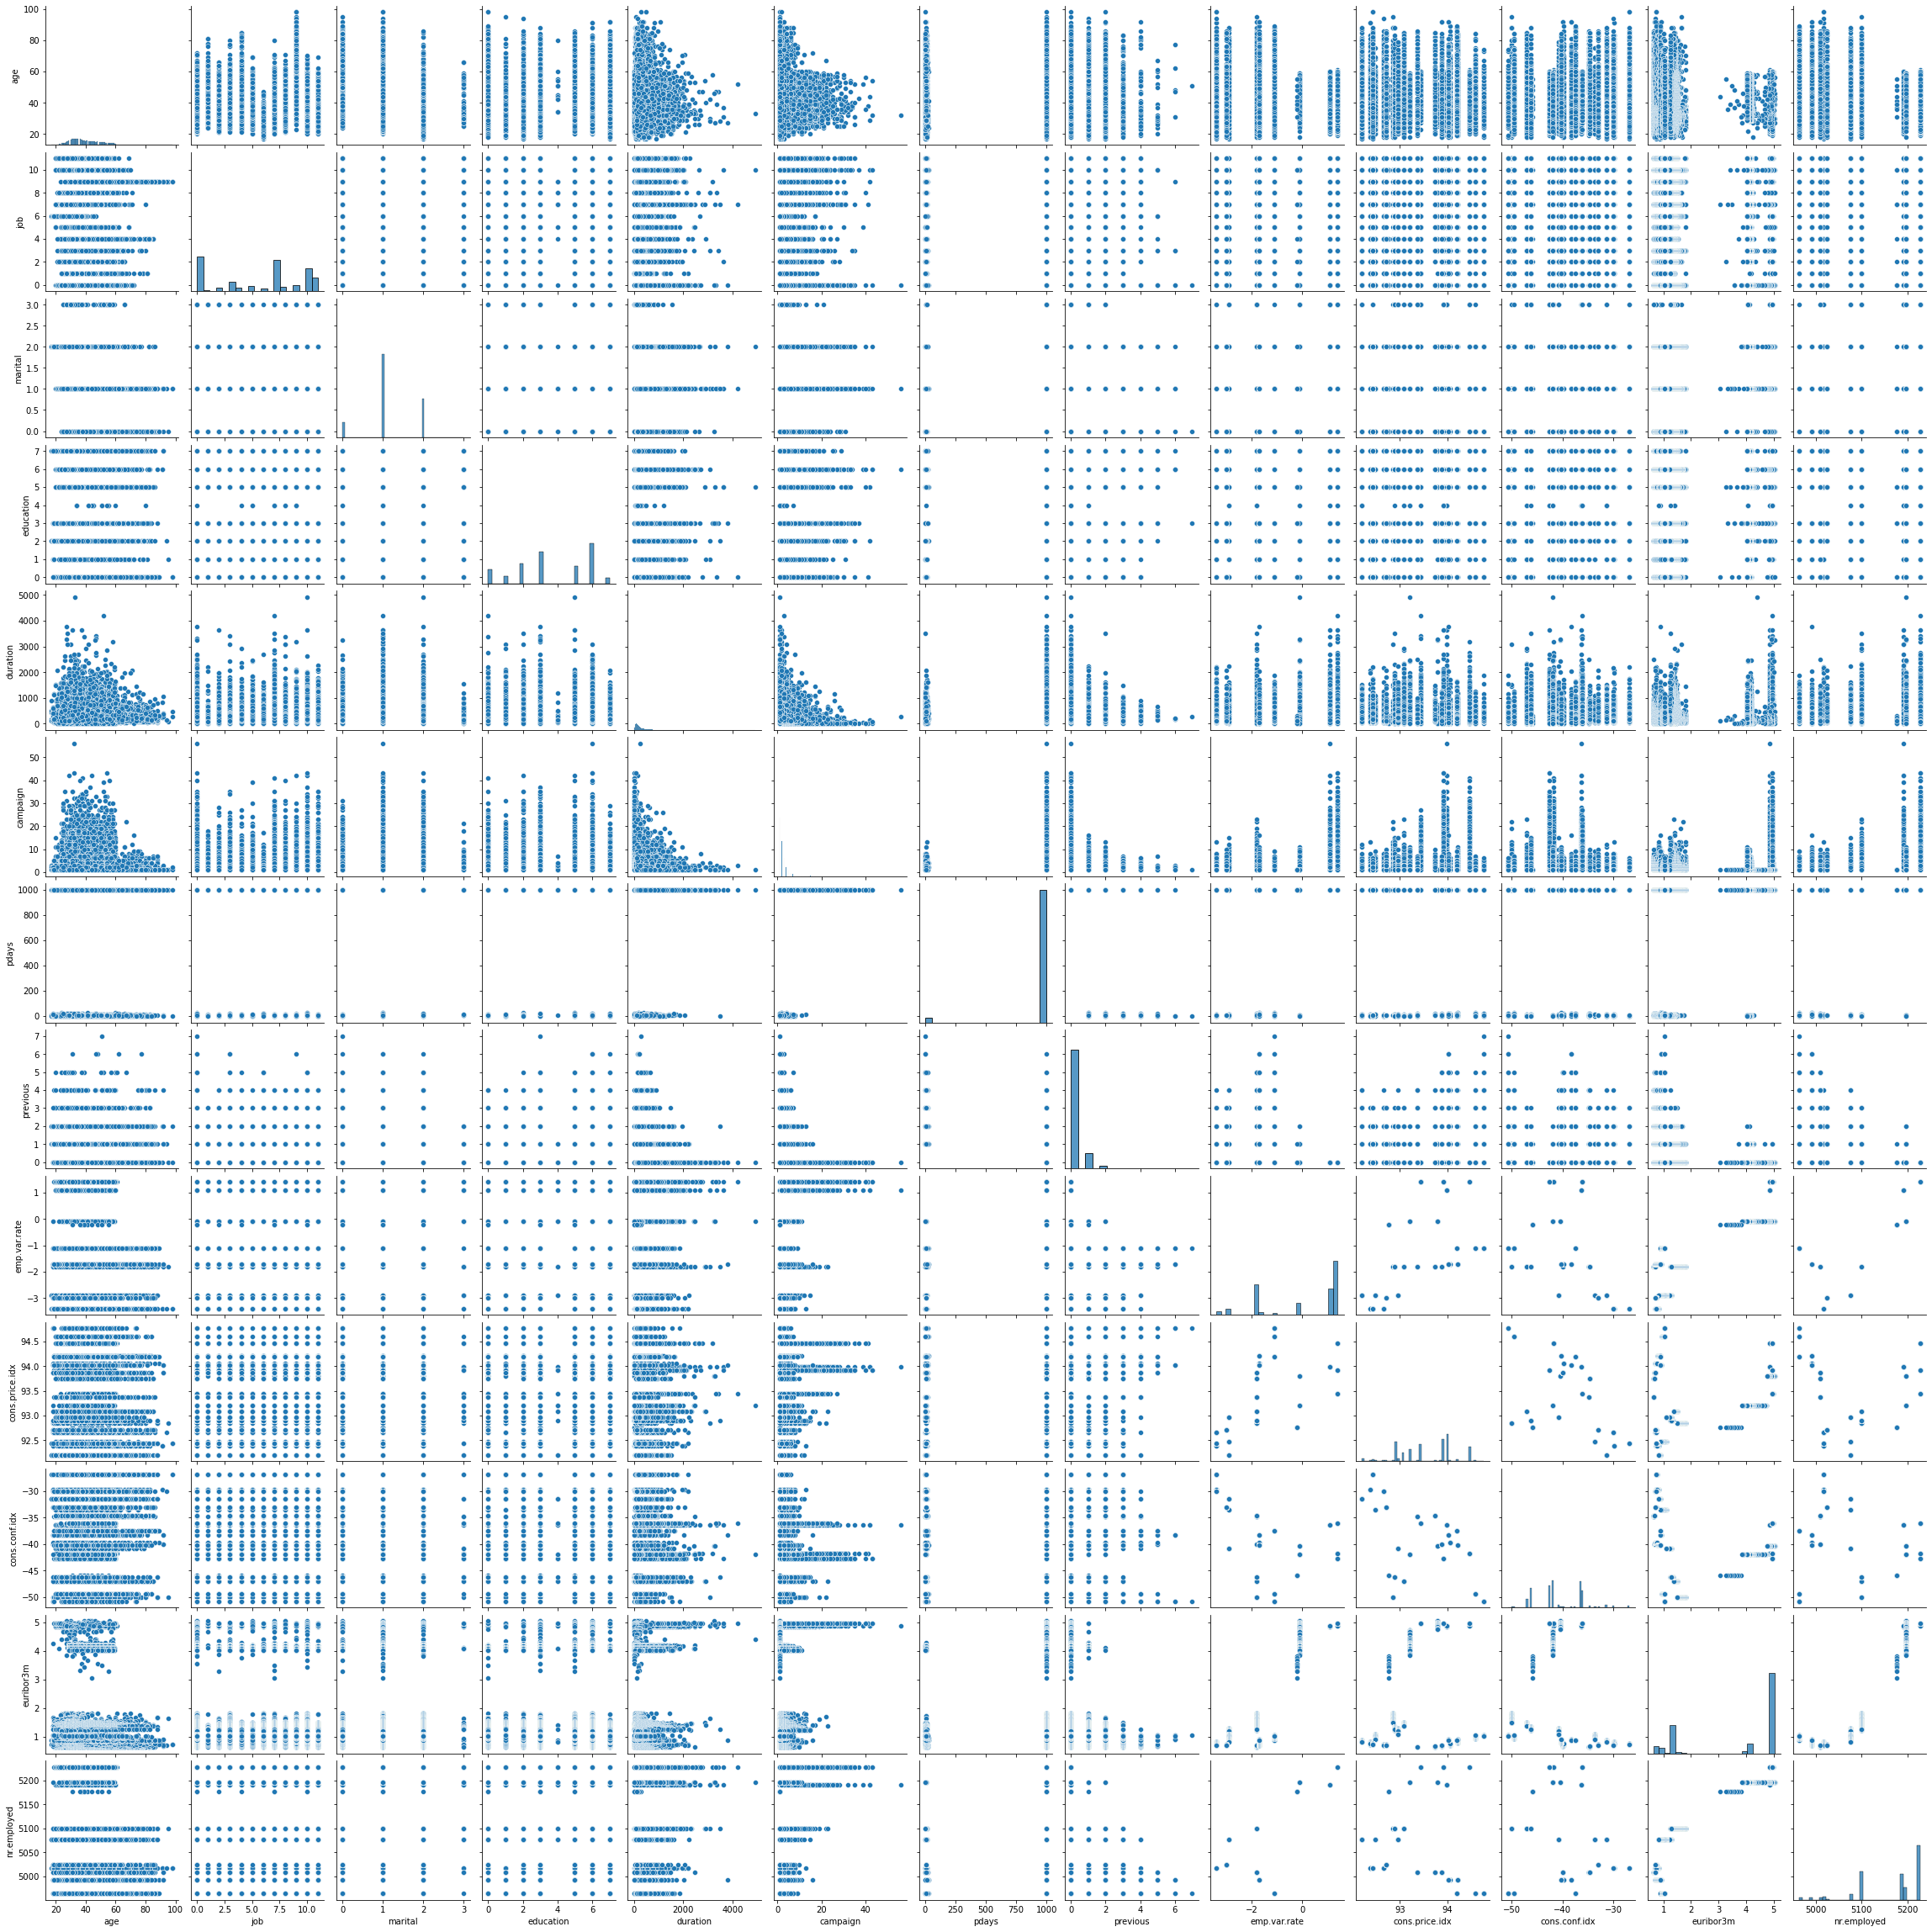

In [ ]:
# 數據集類別之間的關係
sns.pairplot(data)

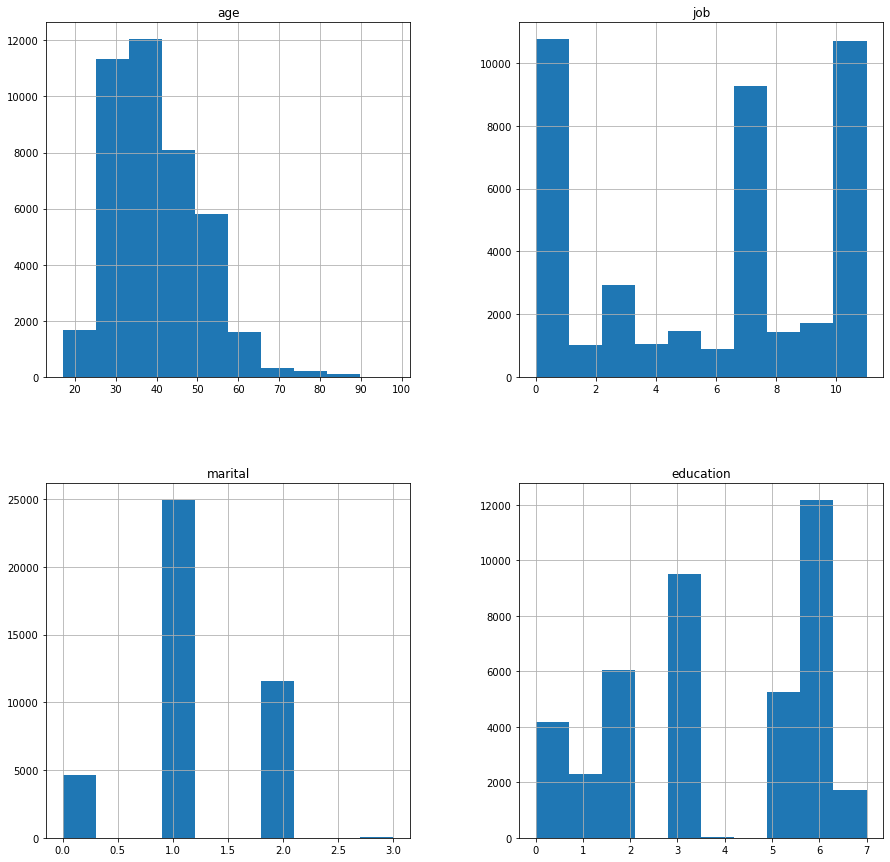

In [ ]:
import matplotlib.pyplot as plt
columns_n = ['age', 'job', 'marital', 'education']
plt.rcParams['figure.figsize'] = (15, 15)

# 繪製成直方圖
data[columns_n].hist()
plt.show()

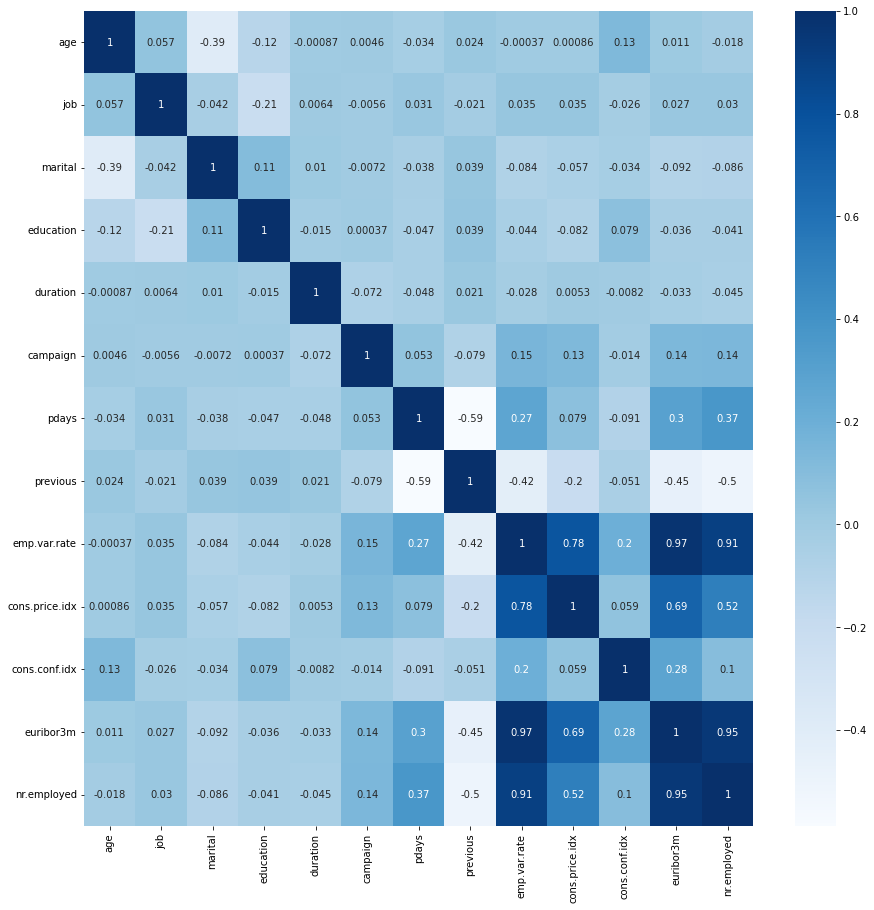

In [ ]:
# 相關係數熱力圖
fig = plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), cmap='Blues', annot = True);

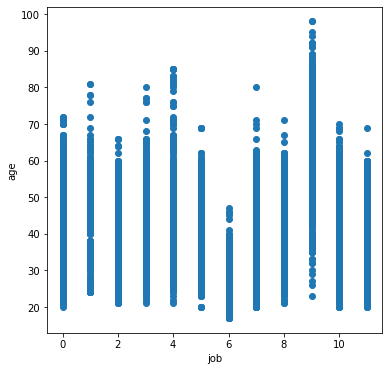

In [ ]:
#工作和年齡之間關係
#繪製散佈圖
plt.figure(figsize=(6,6))
plt.scatter(data['job'], data['age'])

plt.xlabel('job')
plt.ylabel('age')
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


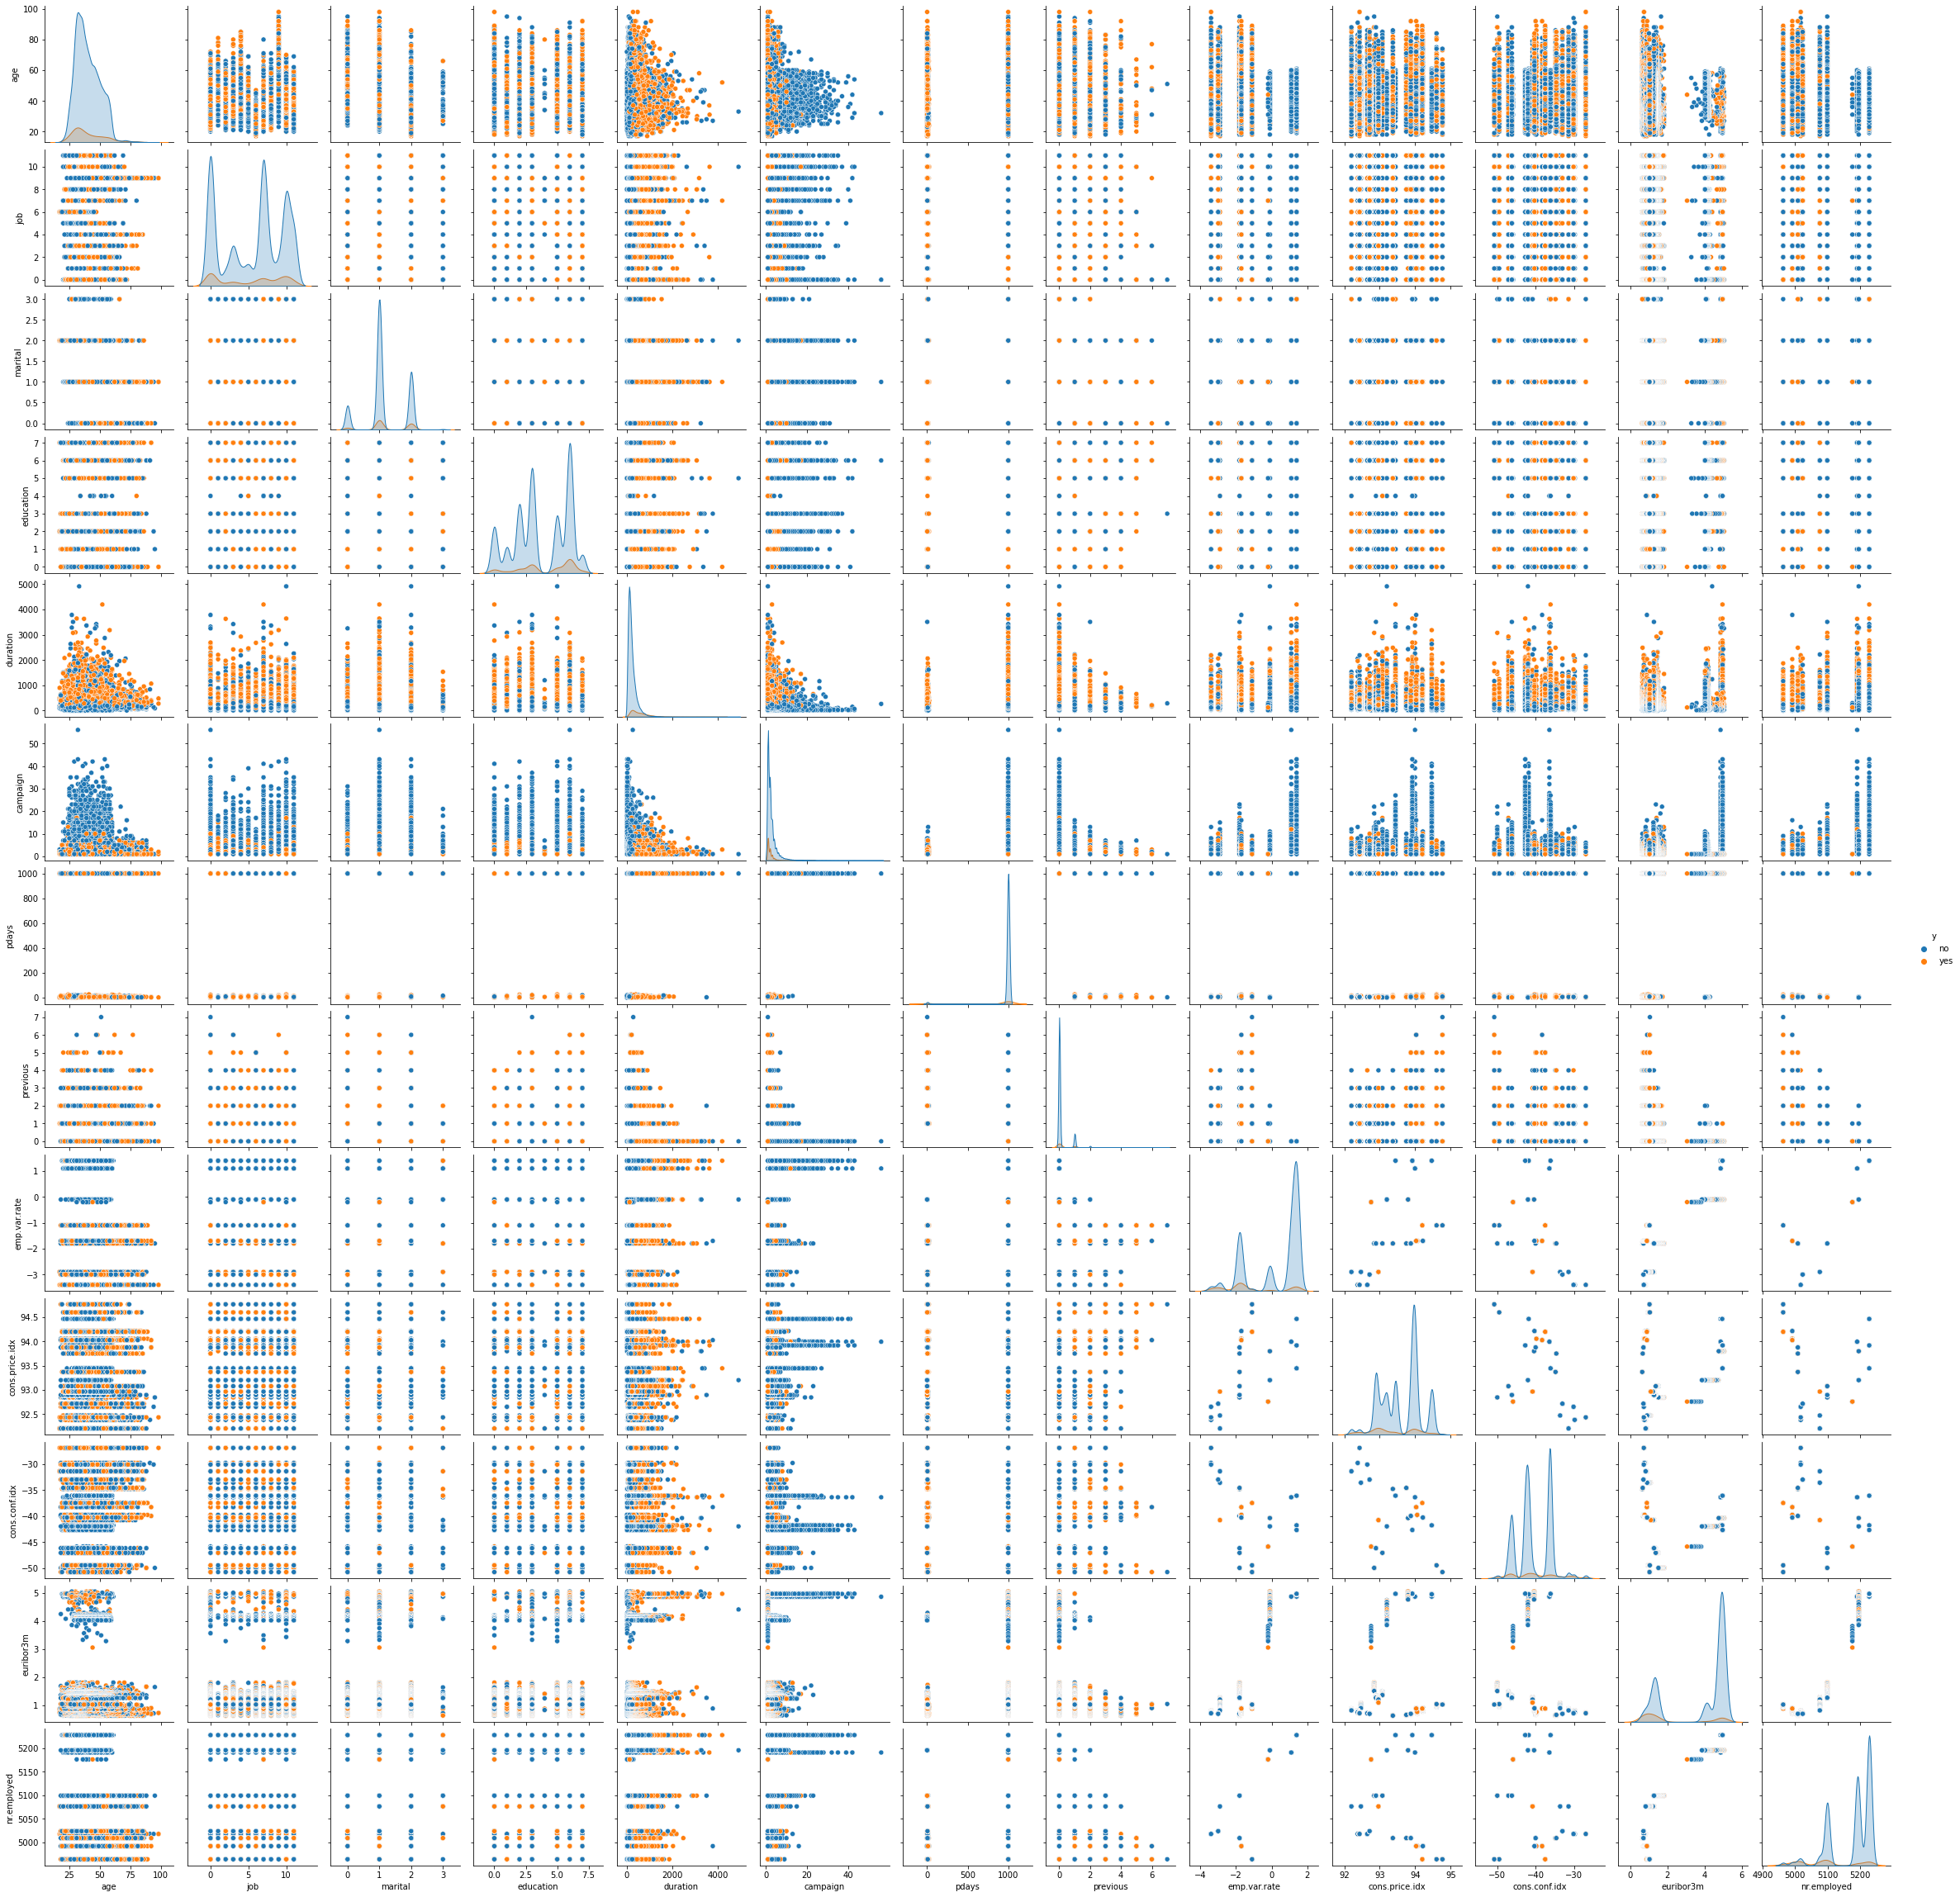

In [ ]:
# 查看客戶是否訂閱了定期存款 與其他類別的關係
sns.pairplot(data,'y')

<AxesSubplot:title={'center':'Job and deposit'}>

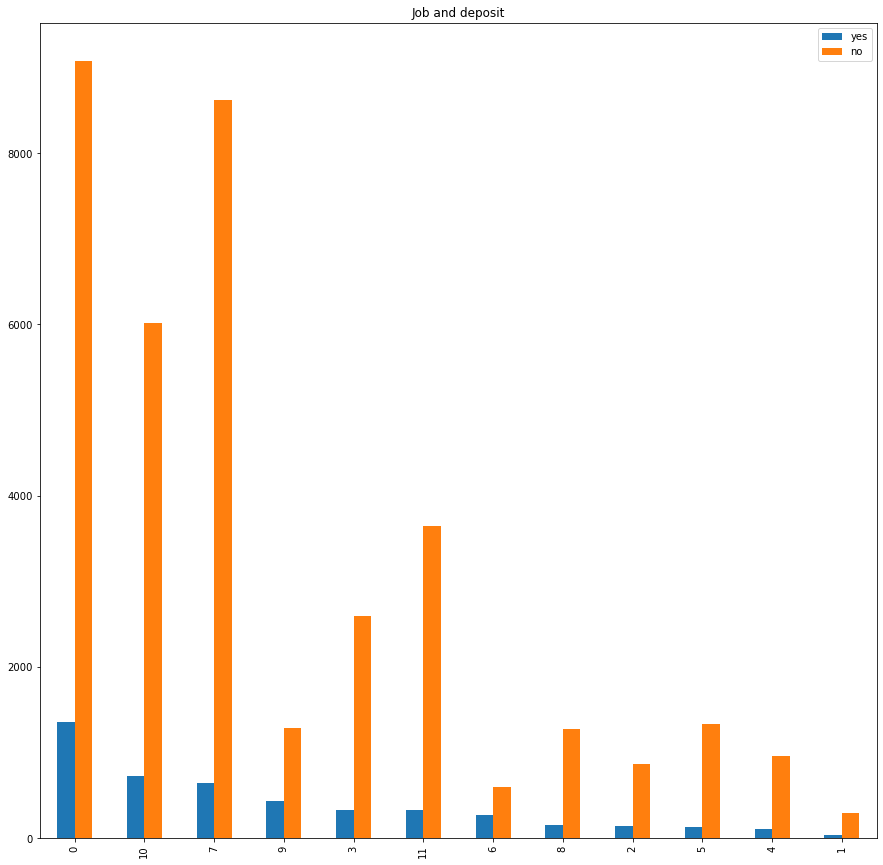

In [ ]:
jobdata = pd.DataFrame()

jobdata['yes'] = data[data['y'] == 'yes']['job'].value_counts()
jobdata['no'] = data[data['y'] == 'no']['job'].value_counts()

jobdata.plot.bar(title = 'Job and deposit')

# 建模與預測

In [ ]:
pip install sweetviz

In [ ]:
#數據探索套件

import sweetviz as sv
import pandas as pd
df = pd.read_csv('/Users/yushan/Desktop/bank.csv')
print(df)
report = sv.analyze(df)
report.show_html('report.html')

#file:///Users/yushan/Downloads/report.html

In [ ]:
# 資料分割 特徵資料集 feature 和目標資料集 target
feature = data.drop('y', axis=1)
target = data['y'] # 設定目標

# 使用 train_test_split 函數將資料分為訓練集和測試集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target,
                                                    shuffle = True,
                                                    test_size=0.2,
                                                    random_state=1)

In [ ]:
# 建立 DecisionTreeClassifier 模型
from sklearn import tree
dt = tree.DecisionTreeClassifier(random_state=None)

# 使用 job 和 y 建立特徵和目標資料集
data_X = data.job
data_y = data.y

# 再次使用 train_test_split 函數將資料分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size = 0.2)

# 建立 DecisionTreeClassifier 模型
clf = tree.DecisionTreeClassifier(random_state=None)

# 將資料轉換為 NumPy 陣列
df1 = np.array(X_test)
df2 = np.array(y_test)

# 將資料轉換為二維陣列
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# 建立KNN模型
knnModel = KNeighborsClassifier(n_neighbors=1000,algorithm='auto')
knnModel.fit(X_train,y_train) # 使用訓練資料訓練模型
predicted = knnModel.predict(X_train) # 使用訓練資料預測分類

print('train: ',knnModel.score(X_train,y_train))
print('test: ',knnModel.score(X_test,y_test))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


train:  0.8862215477996965
test:  0.8918426802621996


KNN預測模型分別為訓練集:88.62%，測試集:89.18%

透過這個模型可以預測到，工作職業對於客戶是否訂閱定期存款有影響。

In [ ]:
knn = KNeighborsClassifier()
#訓練模型
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test)) # 輸出模型在測試集上的準確率

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.880189366351056


以基礎驗證模型的準確率得到 88%。

可以得知所使⽤的預測模型是有一定的可信度。

In [ ]:
#準確率 使用訓練好的模型對測試集進行預測
pred = knn.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix # 匯入混淆矩陣和分類報告函數
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[7211  136]
 [ 851   40]]
              precision    recall  f1-score   support

          no       0.89      0.98      0.94      7347
         yes       0.23      0.04      0.07       891

    accuracy                           0.88      8238
   macro avg       0.56      0.51      0.51      8238
weighted avg       0.82      0.88      0.84      8238



決策樹是⼀個預測模型;他代表的是對象屬性與對象值之間的一種映射關係。

樹中每個節點表示某個對象，⽽每個分叉路徑則代表某個可能的屬性值，

每個葉節點，則對應從根節點到該葉節點所經歷的路徑所表⽰的對象的值。

In [ ]:
from sklearn import metrics

# 決策樹
# 建立分類器
clf = tree.DecisionTreeClassifier()
data_clf = clf.fit(X_train,y_train) # 使用訓練集訓練決策樹模型

# 預測
test_y_predicted = data_clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, test_y_predicted) # 計算模型的準確率
print(accuracy)

0.8918426802621996


決策樹建立分類器 - 預測得到 89.18%。

透過這個模型預測，對於客⼾訂閱定期存款有很高的意願。

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# 輸出混淆矩陣和分類報告
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[7211  136]
 [ 851   40]]
              precision    recall  f1-score   support

          no       0.89      0.98      0.94      7347
         yes       0.23      0.04      0.07       891

    accuracy                           0.88      8238
   macro avg       0.56      0.51      0.51      8238
weighted avg       0.82      0.88      0.84      8238



混淆矩陣看工作職業的不同，是否有影響訂閱定期存款，預測客⼾是否願意訂閱定期存款。

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
print(classification_report(y_test,test_y_predicted))

data_clf.score(X_train,y_train)

# 輸出模型的精確度、召回率和 F1 分數
print("Accuracy:",accuracy_score(y_test, test_y_predicted))
print("Precision:",precision_score(y_test, test_y_predicted,average='weighted'))
print("Recall:",recall_score(y_test, test_y_predicted,average='macro'))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metr

              precision    recall  f1-score   support

          no       0.89      1.00      0.94      7347
         yes       0.00      0.00      0.00       891

    accuracy                           0.89      8238
   macro avg       0.45      0.50      0.47      8238
weighted avg       0.80      0.89      0.84      8238

Accuracy: 0.8918426802621996
Precision: 0.7953833663372639
Recall: 0.5


Accuracy(準確率): 89.18%

Precision(精確率): 79.53%